In [21]:
import pandas as pd
import statsmodels.api as sm
import os

In [14]:
os.getcwd()
os.chdir('/Users/margueritevergne/Downloads/')
oc=pd.read_csv('./occupancy.csv')
oc.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [15]:
oc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
date             2664 non-null object
Temperature      2664 non-null float64
Humidity         2664 non-null float64
Light            2664 non-null float64
CO2              2664 non-null float64
HumidityRatio    2664 non-null float64
Occupancy        2664 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


In [19]:
oc.date=pd.to_datetime(oc.date)
oc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2664 entries, 2015-02-02 14:00:00 to 2015-05-24 13:00:00
Freq: H
Data columns (total 7 columns):
date             2664 non-null datetime64[ns]
Temperature      2664 non-null float64
Humidity         2664 non-null float64
Light            2664 non-null float64
CO2              2664 non-null float64
HumidityRatio    2664 non-null float64
Occupancy        2664 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 166.5 KB


In [17]:
oc.index=pd.DatetimeIndex(oc.date,freq="H")
oc.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


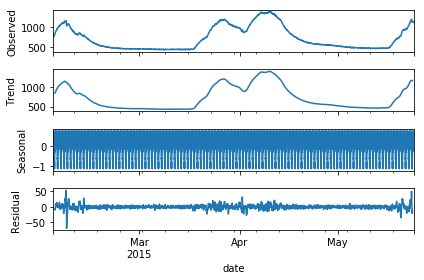

In [27]:
res=sm.tsa.seasonal_decompose(oc.CO2)
resplot=res.plot()

In [31]:
from pandas.plotting import lag_plot

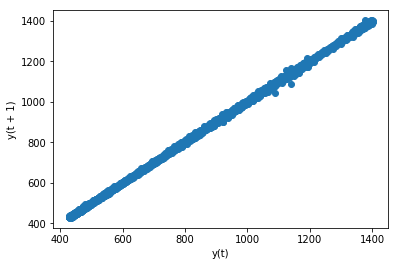

In [32]:
#CO2 versus future. the future increase following the previous temperature
lag_plot(oc.CO2)

In [33]:
from statsmodels.tsa.ar_model import AR

In [34]:
train,test=oc.CO2[:-10],oc.CO2[-10:]
test

date
2015-05-24 04:00:00    1153.250000
2015-05-24 05:00:00    1152.400000
2015-05-24 06:00:00    1146.166667
2015-05-24 07:00:00    1145.400000
2015-05-24 08:00:00    1140.800000
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
2015-05-24 13:00:00    1124.000000
Freq: H, Name: CO2, dtype: float64

In [35]:
model=AR(oc.CO2)
model_fit=model.fit(maxlag=1)
predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

In [36]:
model_fit.params#donne la constante du modèle et la valeur one hour ago 
#yt=alpha + beta1*yt-1+epsilon=constante =alpha, L1.CO2=yt-1

const     0.001078
L1.CO2    1.000195
dtype: float64

In [40]:
model_fit=model.fit(maxlag=3)
model_fit.params

const     0.069790
L1.CO2    1.250047
L2.CO2   -0.201999
L3.CO2   -0.048016
dtype: float64

In [41]:
from statsmodels.tsa.ar_model import ARResults

In [42]:
model_fit.pvalues
#all the lags after the 3rd one are not important because higher than 0.05

const     7.908817e-01
L1.CO2    0.000000e+00
L2.CO2    5.358033e-11
L3.CO2    1.315619e-02
dtype: float64

In [47]:
predictions2=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

In [43]:
predictions

date
2015-05-24 04:00:00    1152.725379
2015-05-24 05:00:00    1153.475525
2015-05-24 06:00:00    1152.625359
2015-05-24 07:00:00    1146.390813
2015-05-24 08:00:00    1145.623997
2015-05-24 09:00:00    1141.023102
2015-05-24 10:00:00    1150.474941
2015-05-24 11:00:00    1129.420844
2015-05-24 12:00:00    1126.020182
2015-05-24 13:00:00    1123.219637
Freq: H, dtype: float64

In [44]:
test

date
2015-05-24 04:00:00    1153.250000
2015-05-24 05:00:00    1152.400000
2015-05-24 06:00:00    1146.166667
2015-05-24 07:00:00    1145.400000
2015-05-24 08:00:00    1140.800000
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
2015-05-24 13:00:00    1124.000000
Freq: H, Name: CO2, dtype: float64

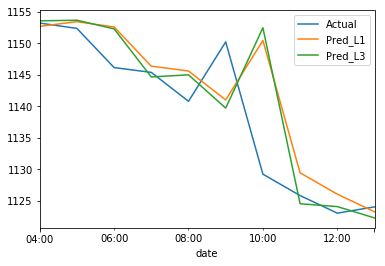

In [49]:
comparison=pd.DataFrame({'Actual':test,'Pred_L1':predictions,'Pred_L3':predictions2})
comparison.plot()

In [ ]:
#Test for Stationarity

In [51]:
from statsmodels.tsa.stattools import adfuller

In [52]:
#
res=adfuller(oc.CO2)
print(f"ADF STATS: {res[0]}")
print(f"p-value: {res[1]}")
print('Critical Values:')
for i,j in res[4].items():
    print(f"\t {i}: {j}")

ADF STATS: -2.73468438341345
p-value: 0.06822624483241077
Critical Values:
	 1%: -3.4328313019591583
	 5%: -2.86263625123482
	 10%: -2.567353572714873


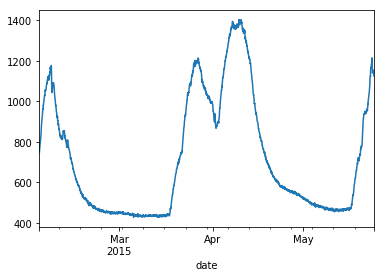

In [53]:
oc.CO2.plot()

In [59]:
yt_1=oc.CO2[:-1]
y_t=oc.CO2[1:]

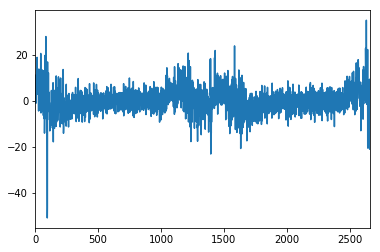

In [60]:
(y_t.reset_index(drop=True)-yt_1.reset_index(drop=True)).plot()

In [62]:
fd=y_t.reset_index(drop=True)-yt_1.reset_index(drop=True)

In [63]:
yt_1=fd[:-1]
y_t=fd[1:]

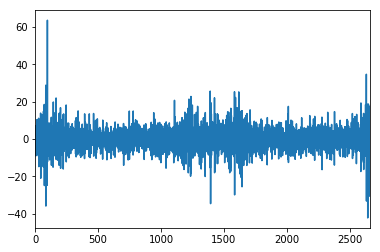

In [64]:
sd=y_t.reset_index(drop=True)-yt_1.reset_index(drop=True)
sd.plot()

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                    CO2   No. Observations:                 2654
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -7870.918
Date:                Thu, 20 Jun 2019   AIC                          15755.837
Time:                        14:18:15   BIC                          15797.013
Sample:                    02-02-2015   HQIC                         15770.742
                         - 05-24-2015                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Humidity       20.9431      1.165     17.975      0.000      18.659      23.227
Temperature     9.2714      3.815      2.430      0.015       1.793      16.749
ar.L1           0.4862      0.163      2.980    

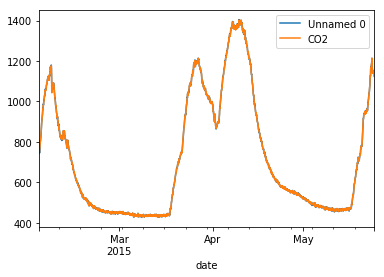

In [65]:
mod = sm.tsa.statespace.SARIMAX(train,order=(2,1,2),seasonal_order=(0,0,0,24),exog = oc[['Humidity','Temperature']][:-10],freq='H', enforce_stationarity=False, enforce_invertibility=False,)
res = mod.fit(disp=False)
print(res.summary())

pd.DataFrame([res.predict(),oc.CO2]).T.plot()

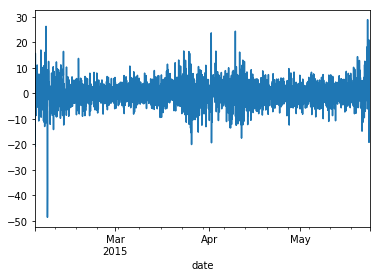

In [66]:
res.resid.plot()